# Prueba 1. EDA

In [489]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

In [490]:
# Load data
df = pd.read_csv('datasets/Clientes_Dummy_Europe_Cities_Random_Clusters.csv')
df

,ClienteID,Income,Ubicacion,HaComprado,FrecuenciaCompra,CategoríaProductoFavorito,GastoMensual,Mes,Año,Edad,...,NúmeroDevoluciones,Latitud,Longitud,Day_of_Week,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value
0,1,31161.480791,Rome,1,3,Electrónica,354.238240,Julio,2022,53,...,0,41.911252,12.501644,Sunday,19,29.764254,2.607769,73.154439,0.271263,257.470986
1,2,30880.904610,Stockholm,1,14,Moda,247.349866,Abril,2022,55,...,0,59.331134,18.062440,Thursday,1,3.066846,5.692095,139.003909,0.888224,35.335695
2,3,24237.173142,Stockholm,1,2,Electrónica,314.977616,Noviembre,2021,28,...,0,59.332634,18.071068,Sunday,11,28.635921,5.626180,32.056281,0.188723,45.524701
3,4,22496.158034,Madrid,0,0,Libros,225.669044,Agosto,2020,50,...,0,40.422948,-3.704413,Sunday,20,209.229483,47.140577,64.074231,0.311976,184.954799
4,5,30825.113991,Paris,1,11,Electrónica,278.430570,Mayo,2020,41,...,0,48.857746,2.345578,Wednesday,5,4.527618,61.676897,210.712576,0.828081,92.810190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,30830.440663,Berlin,1,8,Hogar,341.746413,Septiembre,2022,25,...,2,52.528639,13.409293,Saturday,18,70.781393,61.569749,42.261339,0.263613,129.642799
196,197,24898.083764,Madrid,0,7,Electrónica,282.578068,Mayo,2020,58,...,0,40.392115,-3.693188,Thursday,5,3.536406,25.426559,117.751123,0.546495,282.578068
197,198,28654.527810,Amsterdam,1,5,Electrónica,305.755382,Enero,2020,23,...,1,52.358882,4.906023,Sunday,9,20.355153,6.141810,8.530414,0.006641,57.980584
198,199,37445.225869,Stockholm,1,8,Alimentos,324.730833,Marzo,2020,22,...,0,59.334092,18.062819,Tuesday,18,109.252252,15.019298,73.100675,0.383294,203.649838


In [491]:
df.columns

Index(['ClienteID', 'Income', 'Ubicacion', 'HaComprado', 'FrecuenciaCompra',
       'CategoríaProductoFavorito', 'GastoMensual', 'Mes', 'Año', 'Edad',
       'TiempoEnLaPlataforma', 'ValoracionesPromedio', 'NúmeroDevoluciones',
       'Latitud', 'Longitud', 'Day_of_Week', 'Hour',
       'Days_Since_Last_Purchase', 'Average_Days_Between_Purchases',
       'Monthly_Spending_Std', 'Cancellation_Rate',
       'Average_Transaction_Value'],
      dtype='object')

In [492]:
# Hacer un plot de ubicaciones de los clientes con plotly scatter_geo
fig = px.scatter_geo(df, lat='Latitud', lon='Longitud', color='CategoríaProductoFavorito', 
                     hover_name='Ubicacion', size='GastoMensual', projection='natural earth', scope= 'europe', 
                     title= 'Clientes en Europa, categoría de producto favorito y gasto mensual')

fig.show()

In [468]:
df[['Latitud', 'Longitud', 'Ubicacion']].groupby('Ubicacion').mean()[['Latitud', 'Longitud']]

,Latitud,Longitud
Ubicacion,,
Amsterdam,52.365911,4.905518
Berlin,52.521462,13.402402
Lisbon,38.727101,-9.142559
London,51.507045,-0.124763
Madrid,40.416794,-3.704351
Paris,48.856509,2.354762
Prague,50.073618,14.439609
Rome,41.900834,12.495789
Stockholm,59.329521,18.068961


In [532]:
df_city = df.groupby('Ubicacion').sum().reset_index()
df_city

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\1455729970.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Ubicacion,ClienteID,Income,HaComprado,FrecuenciaCompra,GastoMensual,Año,Edad,TiempoEnLaPlataforma,ValoracionesPromedio,NúmeroDevoluciones,Latitud,Longitud,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value,Cluster
0,Amsterdam,1293,414362.456166,12,92,4241.146818,26274,509,330,43.579047,8,680.756848,63.771734,132,673.288211,424.982594,666.143991,4.627143,1731.978748,9
1,Berlin,2300,707506.879445,19,137,7401.028480,46490,1013,457,79.381390,13,1207.993617,308.255240,312,819.178636,1296.394088,979.267335,8.555952,2628.570380,18
2,Lisbon,2065,587046.144530,13,121,5618.965527,40422,809,511,62.721624,10,774.542019,-182.851175,230,1066.559284,1100.845273,1408.090297,9.403357,2559.824765,25
3,London,2075,492881.741380,10,96,4762.037996,32331,607,448,56.415399,3,824.112723,-1.996210,154,430.638880,806.900752,813.134044,6.859684,2130.791492,15
4,Madrid,2903,932449.828702,20,149,9638.032378,60630,1289,804,102.574061,7,1212.503808,-111.130543,341,1236.700650,1487.064473,1692.071023,10.543276,4201.900276,39
5,Paris,2236,764963.527630,22,181,7498.766222,52543,1240,665,88.649504,9,1270.269224,61.223802,242,807.845739,1125.749385,1417.361468,12.582136,2746.003270,18
6,Prague,2605,619143.095893,19,104,6051.994839,42435,912,565,70.886176,7,1051.545984,303.231792,222,733.354230,916.505812,1128.088037,7.187318,1690.850054,19
7,Rome,2065,697661.960688,18,119,6896.069075,44461,849,556,75.509550,12,921.818345,274.907364,275,592.421023,1064.007224,1038.008615,6.681804,2841.583327,24
8,Stockholm,1929,729794.990808,18,168,7328.062403,44465,997,535,76.764990,9,1305.249466,397.517146,243,941.638962,886.269521,1608.770452,10.780521,3923.813721,13
9,Vienna,629,191219.254744,7,49,2077.146425,14144,264,144,23.638691,2,337.433434,114.609389,108,265.755659,315.916027,507.044281,2.667632,1176.546643,5


In [470]:
df_city[['Latitud', 'Longitud']] = df[['Latitud', 'Longitud', 'Ubicacion']].groupby('Ubicacion').mean()[['Latitud', 'Longitud']].values

In [531]:
df_city

,Ubicacion,ClienteID,Income,HaComprado,FrecuenciaCompra,GastoMensual,Año,Edad,TiempoEnLaPlataforma,ValoracionesPromedio,NúmeroDevoluciones,Latitud,Longitud,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value
0,Amsterdam,1293,414362.456166,12,92,4241.146818,26274,509,330,43.579047,8,52.365911,4.905518,132,673.288211,424.982594,666.143991,4.627143,1731.978748
1,Berlin,2300,707506.879445,19,137,7401.028480,46490,1013,457,79.381390,13,52.521462,13.402402,312,819.178636,1296.394088,979.267335,8.555952,2628.570380
2,Lisbon,2065,587046.144530,13,121,5618.965527,40422,809,511,62.721624,10,38.727101,-9.142559,230,1066.559284,1100.845273,1408.090297,9.403357,2559.824765
3,London,2075,492881.741380,10,96,4762.037996,32331,607,448,56.415399,3,51.507045,-0.124763,154,430.638880,806.900752,813.134044,6.859684,2130.791492
4,Madrid,2903,932449.828702,20,149,9638.032378,60630,1289,804,102.574061,7,40.416794,-3.704351,341,1236.700650,1487.064473,1692.071023,10.543276,4201.900276
5,Paris,2236,764963.527630,22,181,7498.766222,52543,1240,665,88.649504,9,48.856509,2.354762,242,807.845739,1125.749385,1417.361468,12.582136,2746.003270
6,Prague,2605,619143.095893,19,104,6051.994839,42435,912,565,70.886176,7,50.073618,14.439609,222,733.354230,916.505812,1128.088037,7.187318,1690.850054
7,Rome,2065,697661.960688,18,119,6896.069075,44461,849,556,75.509550,12,41.900834,12.495789,275,592.421023,1064.007224,1038.008615,6.681804,2841.583327
8,Stockholm,1929,729794.990808,18,168,7328.062403,44465,997,535,76.764990,9,59.329521,18.068961,243,941.638962,886.269521,1608.770452,10.780521,3923.813721
9,Vienna,629,191219.254744,7,49,2077.146425,14144,264,144,23.638691,2,48.204776,16.372770,108,265.755659,315.916027,507.044281,2.667632,1176.546643


In [471]:
df_city

,Ubicacion,ClienteID,Income,HaComprado,FrecuenciaCompra,GastoMensual,Año,Edad,TiempoEnLaPlataforma,ValoracionesPromedio,NúmeroDevoluciones,Latitud,Longitud,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value
0,Amsterdam,1293,414362.456166,12,92,4241.146818,26274,509,330,43.579047,8,52.365911,4.905518,132,673.288211,424.982594,666.143991,4.627143,1731.978748
1,Berlin,2300,707506.879445,19,137,7401.028480,46490,1013,457,79.381390,13,52.521462,13.402402,312,819.178636,1296.394088,979.267335,8.555952,2628.570380
2,Lisbon,2065,587046.144530,13,121,5618.965527,40422,809,511,62.721624,10,38.727101,-9.142559,230,1066.559284,1100.845273,1408.090297,9.403357,2559.824765
3,London,2075,492881.741380,10,96,4762.037996,32331,607,448,56.415399,3,51.507045,-0.124763,154,430.638880,806.900752,813.134044,6.859684,2130.791492
4,Madrid,2903,932449.828702,20,149,9638.032378,60630,1289,804,102.574061,7,40.416794,-3.704351,341,1236.700650,1487.064473,1692.071023,10.543276,4201.900276
5,Paris,2236,764963.527630,22,181,7498.766222,52543,1240,665,88.649504,9,48.856509,2.354762,242,807.845739,1125.749385,1417.361468,12.582136,2746.003270
6,Prague,2605,619143.095893,19,104,6051.994839,42435,912,565,70.886176,7,50.073618,14.439609,222,733.354230,916.505812,1128.088037,7.187318,1690.850054
7,Rome,2065,697661.960688,18,119,6896.069075,44461,849,556,75.509550,12,41.900834,12.495789,275,592.421023,1064.007224,1038.008615,6.681804,2841.583327
8,Stockholm,1929,729794.990808,18,168,7328.062403,44465,997,535,76.764990,9,59.329521,18.068961,243,941.638962,886.269521,1608.770452,10.780521,3923.813721
9,Vienna,629,191219.254744,7,49,2077.146425,14144,264,144,23.638691,2,48.204776,16.372770,108,265.755659,315.916027,507.044281,2.667632,1176.546643


In [533]:
fig = px.scatter_geo(df_city, lat='Latitud', lon='Longitud', color='GastoMensual', 
                     hover_name='Ubicacion', size=df_city['GastoMensual'], projection='natural earth', scope= 'europe',
                     color_continuous_scale="Cividis",
                     title= 'Ventas en Europa por ciudad')

fig.show()

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\3829354911.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



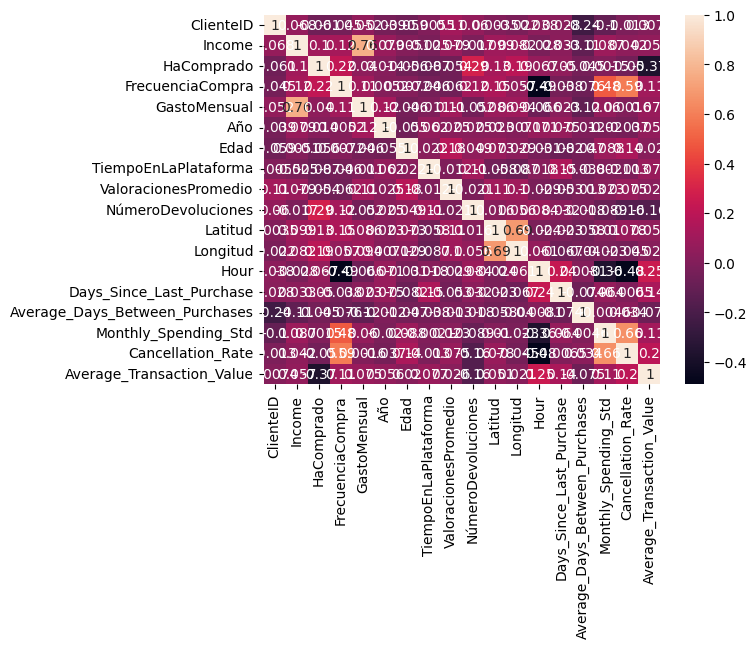

In [473]:
# Mapa de calor de correlación
sns.heatmap(df.corr(), annot=True);

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\1552281386.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



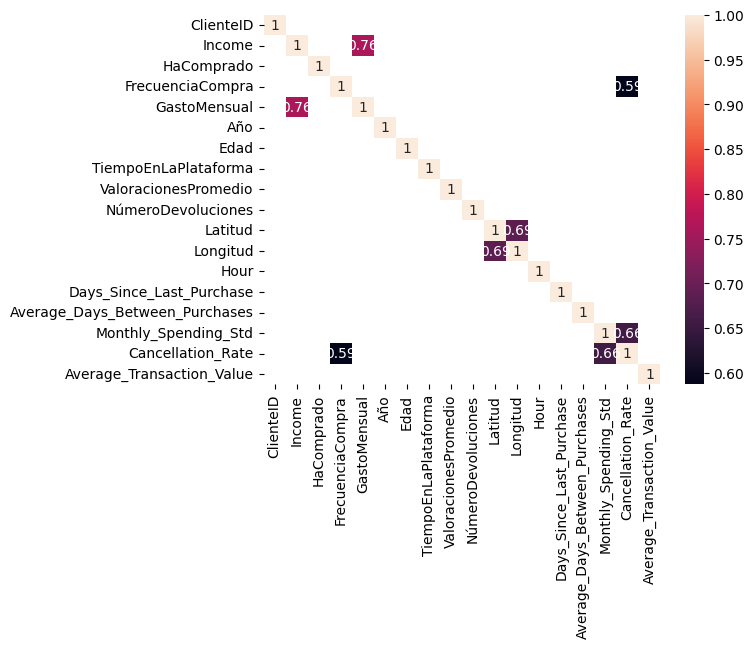

In [493]:
#Mapa de correlación cuando la correlación es mayor a 0.5
sns.heatmap(df.corr()[df.corr() > 0.5], annot=True);


In [475]:
df

,ClienteID,Income,Ubicacion,HaComprado,FrecuenciaCompra,CategoríaProductoFavorito,GastoMensual,Mes,Año,Edad,...,NúmeroDevoluciones,Latitud,Longitud,Day_of_Week,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value
0,1,31161.480791,Rome,1,3,Electrónica,354.238240,Julio,2022,53,...,0,41.911252,12.501644,Sunday,19,29.764254,2.607769,73.154439,0.271263,257.470986
1,2,30880.904610,Stockholm,1,14,Moda,247.349866,Abril,2022,55,...,0,59.331134,18.062440,Thursday,1,3.066846,5.692095,139.003909,0.888224,35.335695
2,3,24237.173142,Stockholm,1,2,Electrónica,314.977616,Noviembre,2021,28,...,0,59.332634,18.071068,Sunday,11,28.635921,5.626180,32.056281,0.188723,45.524701
3,4,22496.158034,Madrid,0,0,Libros,225.669044,Agosto,2020,50,...,0,40.422948,-3.704413,Sunday,20,209.229483,47.140577,64.074231,0.311976,184.954799
4,5,30825.113991,Paris,1,11,Electrónica,278.430570,Mayo,2020,41,...,0,48.857746,2.345578,Wednesday,5,4.527618,61.676897,210.712576,0.828081,92.810190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,30830.440663,Berlin,1,8,Hogar,341.746413,Septiembre,2022,25,...,2,52.528639,13.409293,Saturday,18,70.781393,61.569749,42.261339,0.263613,129.642799
196,197,24898.083764,Madrid,0,7,Electrónica,282.578068,Mayo,2020,58,...,0,40.392115,-3.693188,Thursday,5,3.536406,25.426559,117.751123,0.546495,282.578068
197,198,28654.527810,Amsterdam,1,5,Electrónica,305.755382,Enero,2020,23,...,1,52.358882,4.906023,Sunday,9,20.355153,6.141810,8.530414,0.006641,57.980584
198,199,37445.225869,Stockholm,1,8,Alimentos,324.730833,Marzo,2020,22,...,0,59.334092,18.062819,Tuesday,18,109.252252,15.019298,73.100675,0.383294,203.649838


c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



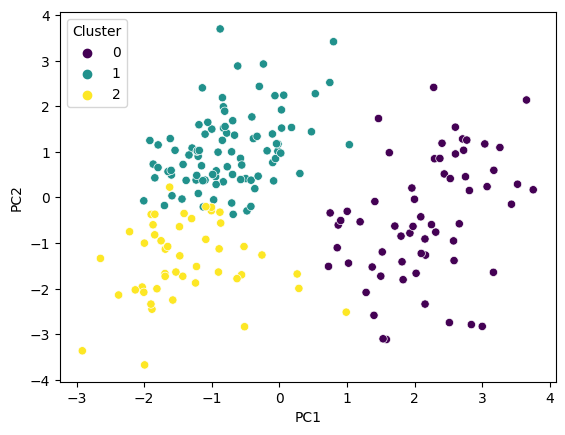

In [494]:
# Clustering con KMeans con 3 clusters, luego hacer un scatter plot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=3)
scaler = StandardScaler()

# usamos variables numéricas
df.select_dtypes(include='number')

# Escalamos las variables numéricas
df_scaled = scaler.fit_transform(df.select_dtypes(include='number'))

# Entrenamos el modelo
kmeans.fit(df_scaled)

# Asignamos los clusters a cada cliente
df['Cluster'] = kmeans.labels_

# pca para reducir a 2 dimensiones
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatter plot con los clusters
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis');

In [537]:
kmeans.predict(np.array([3, 2, 2, 3,5, 6]).reshape(1, -1))

array([1])

In [534]:
df.drop('Cluster', axis=1, inplace=True)

,ClienteID,Income,Ubicacion,HaComprado,FrecuenciaCompra,CategoríaProductoFavorito,GastoMensual,Mes,Año,Edad,...,Latitud,Longitud,Day_of_Week,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value,Cluster
0,1,31161.480791,Rome,1,3,Electrónica,354.238240,Julio,2022,53,...,41.911252,12.501644,Sunday,19,29.764254,2.607769,73.154439,0.271263,257.470986,1
1,2,30880.904610,Stockholm,1,14,Moda,247.349866,Abril,2022,55,...,59.331134,18.062440,Thursday,1,3.066846,5.692095,139.003909,0.888224,35.335695,0
2,3,24237.173142,Stockholm,1,2,Electrónica,314.977616,Noviembre,2021,28,...,59.332634,18.071068,Sunday,11,28.635921,5.626180,32.056281,0.188723,45.524701,1
3,4,22496.158034,Madrid,0,0,Libros,225.669044,Agosto,2020,50,...,40.422948,-3.704413,Sunday,20,209.229483,47.140577,64.074231,0.311976,184.954799,2
4,5,30825.113991,Paris,1,11,Electrónica,278.430570,Mayo,2020,41,...,48.857746,2.345578,Wednesday,5,4.527618,61.676897,210.712576,0.828081,92.810190,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,30830.440663,Berlin,1,8,Hogar,341.746413,Septiembre,2022,25,...,52.528639,13.409293,Saturday,18,70.781393,61.569749,42.261339,0.263613,129.642799,1
196,197,24898.083764,Madrid,0,7,Electrónica,282.578068,Mayo,2020,58,...,40.392115,-3.693188,Thursday,5,3.536406,25.426559,117.751123,0.546495,282.578068,2
197,198,28654.527810,Amsterdam,1,5,Electrónica,305.755382,Enero,2020,23,...,52.358882,4.906023,Sunday,9,20.355153,6.141810,8.530414,0.006641,57.980584,1
198,199,37445.225869,Stockholm,1,8,Alimentos,324.730833,Marzo,2020,22,...,59.334092,18.062819,Tuesday,18,109.252252,15.019298,73.100675,0.383294,203.649838,1


In [495]:
# Sacamos la media de características por cluster
df.groupby('Cluster').mean()

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\1705896441.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ClienteID,Income,HaComprado,FrecuenciaCompra,GastoMensual,Año,Edad,TiempoEnLaPlataforma,ValoracionesPromedio,NúmeroDevoluciones,Latitud,Longitud,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value
Cluster,,,,,,,,,,,,,,,,,,
0,100.032258,31513.096968,0.741935,10.177419,320.067394,2020.967742,44.629032,24.887097,3.449721,0.225806,48.745034,5.727064,2.403226,29.549214,42.894027,105.164850,0.763049,133.415925
1,101.285714,32063.397107,0.956044,5.054945,326.060355,2021.109890,41.648352,24.186813,3.399577,0.582418,49.950426,9.900218,16.098901,41.893855,40.828660,33.195762,0.208872,121.678940
2,99.595745,26924.441090,0.531915,2.659574,255.267646,2020.723404,41.106383,27.042553,3.337792,0.276596,42.947756,-0.605517,13.723404,40.914664,64.889306,36.530734,0.288775,133.772167


In [497]:
df_reducido = df[['HaComprado', 'Average_Days_Between_Purchases', 'GastoMensual', 'Monthly_Spending_Std', 'Average_Transaction_Value']]

In [527]:
df_reducido[['Latitud', 'Longitud', 'Ubicacion']] = df[['Latitud', 'Longitud', 'Ubicacion']]
df_reducido

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\2758195232.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,HaComprado,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value,Cluster,Latitud,Longitud,Ubicacion
0,1,2.607769,354.238240,73.154439,257.470986,2,41.911252,12.501644,Rome
1,1,5.692095,247.349866,139.003909,35.335695,0,59.331134,18.062440,Stockholm
2,1,5.626180,314.977616,32.056281,45.524701,2,59.332634,18.071068,Stockholm
3,0,47.140577,225.669044,64.074231,184.954799,1,40.422948,-3.704413,Madrid
4,1,61.676897,278.430570,210.712576,92.810190,0,48.857746,2.345578,Paris
...,...,...,...,...,...,...,...,...,...
195,1,61.569749,341.746413,42.261339,129.642799,2,52.528639,13.409293,Berlin
196,0,25.426559,282.578068,117.751123,282.578068,1,40.392115,-3.693188,Madrid
197,1,6.141810,305.755382,8.530414,57.980584,2,52.358882,4.906023,Amsterdam
198,1,15.019298,324.730833,73.100675,203.649838,2,59.334092,18.062819,Stockholm


c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\1059541772.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



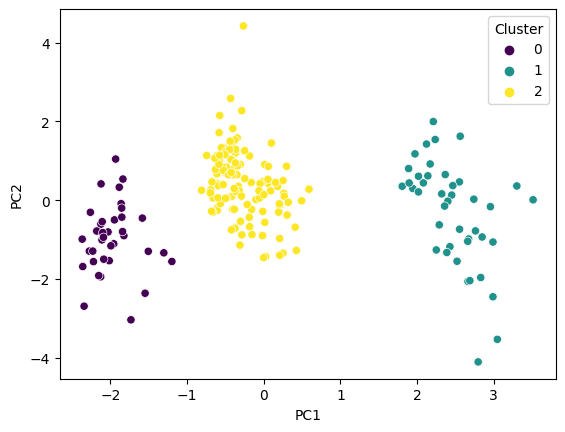

In [521]:
# Clustering con KMeans con 3 clusters, luego hacer un scatter plot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=3)
scaler = StandardScaler()

# usamos variables numéricas
df_reducido.select_dtypes(include='number')

# Escalamos las variables numéricas
df_reducido_scaled = scaler.fit_transform(df_reducido.select_dtypes(include='number'))

# Entrenamos el modelo
kmeans.fit(df_reducido_scaled)

# Asignamos los clusters a cada cliente
df_reducido['Cluster'] = kmeans.labels_

# pca para reducir a 2 dimensiones
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_reducido_pca = pca.fit_transform(df_reducido_scaled)

# Scatter plot con los clusters
df_reducido_pca = pd.DataFrame(df_reducido_pca, columns=['PC1', 'PC2'])
df_reducido_pca['Cluster'] = df_reducido['Cluster']

sns.scatterplot(data=df_reducido_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis');

In [523]:
grouped = df_reducido.groupby('Cluster').mean()
grouped

,HaComprado,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value
Cluster,,,,,
0,1.0,42.830554,328.587682,130.358830,76.668006
1,0.0,51.646489,301.880937,56.148621,198.964259
2,1.0,46.832645,303.320445,34.482128,118.977997


In [382]:
df.select_dtypes(include='number')

,ClienteID,Income,HaComprado,FrecuenciaCompra,GastoMensual,Año,Edad,TiempoEnLaPlataforma,ValoracionesPromedio,NúmeroDevoluciones,Latitud,Longitud,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value,Cluster
0,1,31161.480791,1,3,354.238240,2022,53,29,2.938472,0,41.911252,12.501644,19,29.764254,2.607769,73.154439,0.271263,257.470986,0
1,2,30880.904610,1,14,247.349866,2022,55,28,3.423618,0,59.331134,18.062440,1,3.066846,5.692095,139.003909,0.888224,35.335695,2
2,3,24237.173142,1,2,314.977616,2021,28,11,3.794707,0,59.332634,18.071068,11,28.635921,5.626180,32.056281,0.188723,45.524701,0
3,4,22496.158034,0,0,225.669044,2020,50,1,3.898351,0,40.422948,-3.704413,20,209.229483,47.140577,64.074231,0.311976,184.954799,1
4,5,30825.113991,1,11,278.430570,2020,41,43,3.417591,0,48.857746,2.345578,5,4.527618,61.676897,210.712576,0.828081,92.810190,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,30830.440663,1,8,341.746413,2022,25,32,2.735094,2,52.528639,13.409293,18,70.781393,61.569749,42.261339,0.263613,129.642799,0
196,197,24898.083764,0,7,282.578068,2020,58,20,3.518328,0,40.392115,-3.693188,5,3.536406,25.426559,117.751123,0.546495,282.578068,2
197,198,28654.527810,1,5,305.755382,2020,23,11,3.384524,1,52.358882,4.906023,9,20.355153,6.141810,8.530414,0.006641,57.980584,0
198,199,37445.225869,1,8,324.730833,2020,22,15,2.892156,0,59.334092,18.062819,18,109.252252,15.019298,73.100675,0.383294,203.649838,0


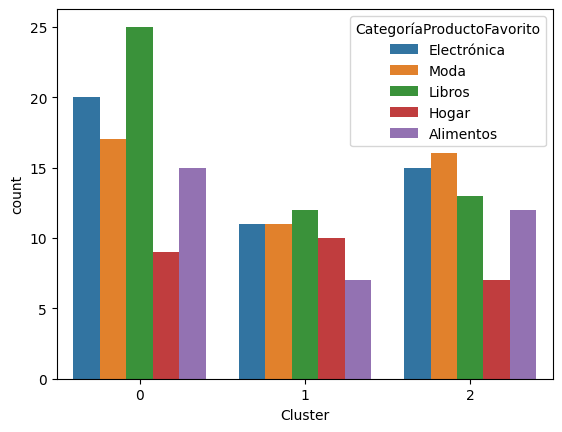

In [383]:
# Top categoría de producto favorito por cluster
df.groupby('Cluster')['CategoríaProductoFavorito'].value_counts()

# Graficamos la distribución de categorías de producto favorito por cluster
sns.countplot(data=df, x='Cluster', hue='CategoríaProductoFavorito');



In [384]:
df[df['Cluster'] == 0]['CategoríaProductoFavorito'].value_counts()

Libros         25
Electrónica    20
Moda           17
Alimentos      15
Hogar           9
Name: CategoríaProductoFavorito, dtype: int64

In [385]:
df[df['Cluster'] == 1]['CategoríaProductoFavorito'].value_counts()

Libros         12
Moda           11
Electrónica    11
Hogar          10
Alimentos       7
Name: CategoríaProductoFavorito, dtype: int64

In [386]:
df[df['Cluster'] == 2]['CategoríaProductoFavorito'].value_counts()

Moda           16
Electrónica    15
Libros         13
Alimentos      12
Hogar           7
Name: CategoríaProductoFavorito, dtype: int64

In [387]:
# Visualizacion 3d de los clusters con 3 componentes principales
pca = PCA(n_components=3)

df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = df['Cluster']

fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Cluster', opacity=0.7)
fig.show()

In [388]:
# Top ubicación por cluster
df.groupby('Cluster')['Ubicacion'].value_counts()


Cluster  Ubicacion
0        Berlin       15
         Prague       13
         Stockholm    13
         Rome         12
         Paris         9
         Amsterdam     8
         Madrid        7
         Vienna        5
         London        4
1        Madrid       15
         Lisbon       13
         London        6
         Rome          6
         Paris         5
         Prague        3
         Berlin        2
         Amsterdam     1
2        Paris        12
         Stockholm     9
         Madrid        8
         Lisbon        7
         Berlin        6
         London        6
         Prague        5
         Amsterdam     4
         Rome          4
         Vienna        2
Name: Ubicacion, dtype: int64

In [389]:
# Recomienda un producto a un cliente basandote en cuales son los productos más populares en su cluster

# Recomendación para el cliente 0
cluster_cliente_0 = df.loc[0, 'Cluster']
productos_populares_cluster_0 = df[df['Cluster'] == cluster_cliente_0]['CategoríaProductoFavorito'].value_counts().index

productos_populares_cluster_0

# Recomendación para el cliente 1
cluster_cliente_1 = df.loc[1, 'Cluster']
productos_populares_cluster_1 = df[df['Cluster'] == cluster_cliente_1]['CategoríaProductoFavorito'].value_counts().index

productos_populares_cluster_1

# Recomendación para el cliente 2
cluster_cliente_2 = df.loc[2, 'Cluster']

productos_populares_cluster_2 = df[df['Cluster'] == cluster_cliente_2]['CategoríaProductoFavorito'].value_counts().index

productos_populares_cluster_2

# Recomendación para el cliente 3
cluster_cliente_3 = df.loc[3, 'Cluster']

productos_populares_cluster_3 = df[df['Cluster'] == cluster_cliente_3]['CategoríaProductoFavorito'].value_counts().index

productos_populares_cluster_3

print('Recomendación para el cliente 0:', productos_populares_cluster_0[0])
print('Recomendación para el cliente 1:', productos_populares_cluster_1[0])
print('Recomendación para el cliente 2:', productos_populares_cluster_2[0])
print('Recomendación para el cliente 3:', productos_populares_cluster_3[0])


Recomendación para el cliente 0: Libros
Recomendación para el cliente 1: Moda
Recomendación para el cliente 2: Libros
Recomendación para el cliente 3: Libros


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ClienteID                       200 non-null    int64  
 1   Income                          200 non-null    float64
 2   Ubicacion                       200 non-null    object 
 3   HaComprado                      200 non-null    int64  
 4   FrecuenciaCompra                200 non-null    int64  
 5   CategoríaProductoFavorito       200 non-null    object 
 6   GastoMensual                    200 non-null    float64
 7   Mes                             200 non-null    object 
 8   Año                             200 non-null    int64  
 9   Edad                            200 non-null    int64  
 10  TiempoEnLaPlataforma            200 non-null    int64  
 11  ValoracionesPromedio            200 non-null    float64
 12  NúmeroDevoluciones              200 

In [391]:
df.columns

Index(['ClienteID', 'Income', 'Ubicacion', 'HaComprado', 'FrecuenciaCompra',
       'CategoríaProductoFavorito', 'GastoMensual', 'Mes', 'Año', 'Edad',
       'TiempoEnLaPlataforma', 'ValoracionesPromedio', 'NúmeroDevoluciones',
       'Latitud', 'Longitud', 'Day_of_Week', 'Hour',
       'Days_Since_Last_Purchase', 'Average_Days_Between_Purchases',
       'Monthly_Spending_Std', 'Cancellation_Rate',
       'Average_Transaction_Value', 'Cluster'],
      dtype='object')

# Dataset final

In [392]:
df.groupby('Cluster').mean()

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\1014496128.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ClienteID,Income,HaComprado,FrecuenciaCompra,GastoMensual,Año,Edad,TiempoEnLaPlataforma,ValoracionesPromedio,NúmeroDevoluciones,Latitud,Longitud,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value
Cluster,,,,,,,,,,,,,,,,,,
0,103.569767,32159.494060,0.953488,5.093023,327.062037,2021.139535,42.046512,24.523256,3.410448,0.593023,50.017834,10.343303,16.104651,42.222308,35.436342,33.404603,0.211815,125.167011
1,94.000000,27305.946962,0.588235,2.745098,259.983500,2020.725490,40.156863,26.333333,3.321977,0.294118,43.570735,-0.262162,14.117647,41.189708,72.397128,34.259056,0.270926,123.786948
2,101.571429,31408.096758,0.730159,10.126984,319.472325,2020.952381,44.841270,24.809524,3.450810,0.222222,48.612448,5.577536,2.444444,29.136312,42.616766,105.364632,0.759611,135.783578


In [393]:
df.to_csv('datasets/Clientes_Dummy_Europe_Cities_Random_ClustersCreated.csv', index=False)

In [394]:
# Cargar el conjunto de datos proporcionado con la columna "Cluster"
file_path_clusters_created = 'datasets/Clientes_Dummy_Europe_Cities_Random_ClustersCreated.csv'
clientes_clusters = pd.read_csv(file_path_clusters_created)

# Aplicar las modificaciones solicitadas para hacer más demostrativos los clusters

# 1. 'GastoMensual' más alto cuando 'Income' es mayor
clientes_clusters['GastoMensual'] = clientes_clusters['Income'] * 0.05 + np.random.normal(0, 50, size=200)

# 2. Hacer que 'Edad' varíe más
clientes_clusters['Edad'] = np.random.randint(18, 70, size=200)

# 3. 'TiempoEnLaPlataforma' más alto cuando 'FrecuenciaCompra' es más bajo
clientes_clusters['TiempoEnLaPlataforma'] = clientes_clusters['FrecuenciaCompra'].apply(lambda x: np.random.exponential(scale=120/(x+1)))

# 4. Menos 'NúmeroDevoluciones' cuando más 'HaComprado'
clientes_clusters['NúmeroDevoluciones'] = clientes_clusters['HaComprado'].apply(lambda x: np.random.poisson(lam=(1 if x > 0 else 2)))

# 5. 'Average_Days_Between_Purchases' menor cuando 'Days_Since_Last_Purchase' y 'FrecuenciaCompra' son menores
clientes_clusters['Average_Days_Between_Purchases'] = clientes_clusters.apply(
    lambda x: np.random.exponential(scale=30 - x['FrecuenciaCompra']) if x['Days_Since_Last_Purchase'] < 30 else np.random.exponential(scale=60), axis=1)

# Guardar los cambios en un nuevo archivo CSV
new_file_path_final_clusters = 'datasets/Clientes_Dummy_Europe_Cities_Random_ClustersCreatedModified1.csv'
clientes_clusters.to_csv(new_file_path_final_clusters, index=False)


In [395]:
df_city_2 = clientes_clusters.groupby('Ubicacion').sum().reset_index()
df_city_2
df_city_2[['Latitud', 'Longitud']] = clientes_clusters[['Latitud', 'Longitud', 'Ubicacion']].groupby('Ubicacion').mean()[['Latitud', 'Longitud']].values


C:\Users\misla\AppData\Local\Temp\ipykernel_24032\1564804792.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [396]:
fig = px.scatter_geo(df_city_2, lat='Latitud', lon='Longitud', color='GastoMensual', 
                     hover_name='Ubicacion', size=df_city_2['GastoMensual'] * 1000, projection='natural earth', scope= 'europe',
                     color_continuous_scale="Cividis",
                     title= 'Ventas en Europa por ciudad')

fig.show()

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\1592404474.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



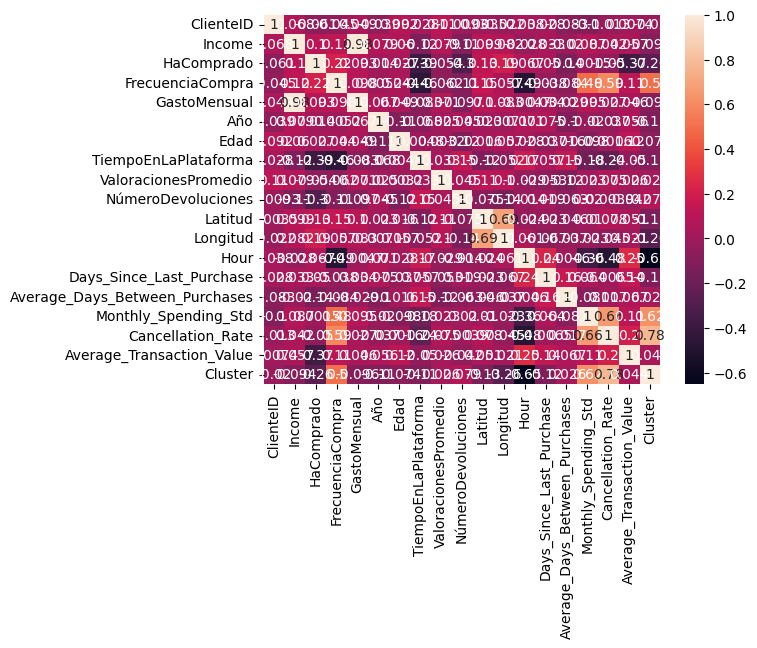

In [397]:
sns.heatmap(clientes_clusters.corr(), annot=True);

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\4186400042.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



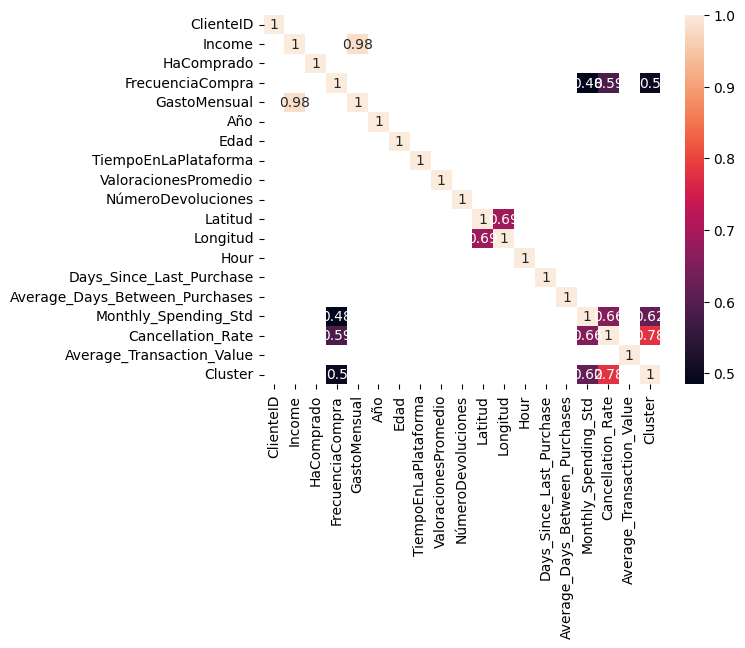

In [398]:
#Mapa de correlación cuando la correlación es mayor a 0.5
sns.heatmap(clientes_clusters.corr()[clientes_clusters.corr() > 0.4], annot=True);

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



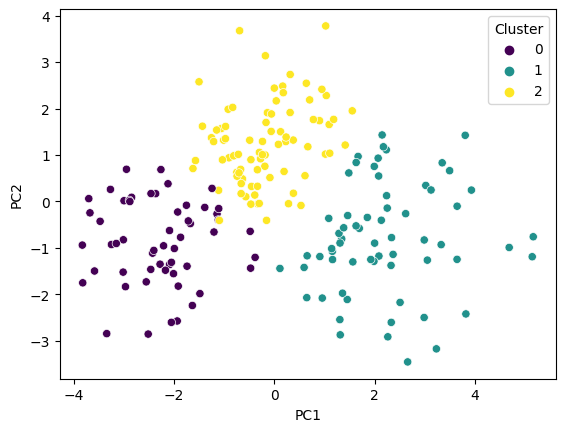

In [452]:
# Clustering con KMeans con 3 clusters, luego hacer un scatter plot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=3)
scaler = StandardScaler()

# usamos variables numéricas
df.select_dtypes(include='number')

# Escalamos las variables numéricas
df_scaled = scaler.fit_transform(df.select_dtypes(include='number'))

# Entrenamos el modelo
kmeans.fit(df_scaled)

# Asignamos los clusters a cada cliente
df['Cluster'] = kmeans.labels_

# pca para reducir a 2 dimensiones
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatter plot con los clusters
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis');

In [453]:
# Sacamos la media de características por cluster
df.groupby('Cluster').mean()

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\1705896441.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ClienteID,Income,HaComprado,FrecuenciaCompra,GastoMensual,Año,Edad,TiempoEnLaPlataforma,ValoracionesPromedio,NúmeroDevoluciones,Latitud,Longitud,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value
Cluster,,,,,,,,,,,,,,,,,,
0,98.527273,26977.914750,0.981818,3.072727,254.529967,2020.672727,40.236364,26.563636,3.343640,0.309091,44.270403,0.420720,13.836364,15.887509,15.734011,9.111717,0.260920,26.619394
1,101.781250,31434.051601,0.734375,10.109375,319.466930,2020.937500,45.031250,24.843750,3.460437,0.114062,48.635289,5.716201,22.390625,50.915003,42.306013,105.454931,0.065569,135.547456
2,100.827160,32610.682300,1.000000,4.938272,334.175537,2021.209877,41.901235,50.790123,3.392004,0.172593,49.860430,10.352618,16.358025,41.592693,38.242959,32.478019,0.212862,75.219245


### Columnas de interés

* Ha comprado
* Frecuencia compra
* Gasto mensual
* Tiempo en la plataforma - Esto lo asumimos como tiempo dado de alta en la plataforma
* Número devoluciones
* Hour
* Days_Since_Last_Purchase
* Average_Days_Between_Purchases
* Desviación Monthly Spending
* Cancellation Rate
* Average Transaction Value

### Perfil de cada cluster:

0. El mas diferenciado, 75% "Ha comprado", su frecuencia de compra es bastante mayor (compra esporádicamente), su gasto mensual no se diferencia, el tiempo en la plataforma no se diferencia (Mantenerlo medio), la hora a la que se conecta es a las 2 am (Cambiémoslo a 10 p.m.),sus dias de última compra son menores (no tiene sentido, debería tener mas dias de última compra, hagámoslo mayor), su promedio de dias entre compras es medio (Hagámoslo mayor), su gasto std mensual es bastante mayor (está bien), su cancellation rate es muy alto (bajarlo), su promedio de transacción es igual a los demás

2. Se parece al 2, 52% "Ha comprado" (subámoslo), su frecuencia de compra es bastante baja (compra muy frecuentemente), su gasto mensual es menor (colocar mediano, por ver), su tiempo en la plataforma es medio (subámoslo), devoluciones es baja (subámoslo a medio), su hora a la 13 está bien, días desde la última compra bajarlo (porque suele comprar frecuentemente), días promedio entre compras bajarlo también, Monthly_Spending_Std es bajo (está bien), cancellation rate bajarlo (mantenerlo medio), su promedio de transacción es igual a los demás (bajar)

1. Se parece al 1, 97% han comprado (esto por ver si está bien), frecuencia de compra es media, gasto mensual medio (bajarlo), tiempo en la plataforma es medio (subirlo más que los demas notablemente), la hora que sea a las 4 p.m., sus dias de última compra que sean medios, promedio entre compras que sea alto (Muchos días), radio de cancelación bajo, desviación de monthly spending baja, average transaction value medio

In [450]:
# A csv
df.to_csv('datasets/Clientes_Dummy_Europe_Cities_Random_Final_Con_Negativos.csv', index=False)

### Nombre de perfiles

0: Comprador que va muy seguro de lo que compra
1: Comprador impulsivo
2: Cliente habitual veterano, sobrio, medio

In [451]:
# Visualizacion 3d de los clusters con 3 componentes principales
pca = PCA(n_components=3)

df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = df['Cluster']

fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Cluster', opacity=0.7)
fig.show()

## Aplicando cambios a las medias

### Perfil de cada cluster:

0. El mas diferenciado, 75% "Ha comprado", su frecuencia de compra es bastante mayor (compra esporádicamente), su gasto mensual no se diferencia, el tiempo en la plataforma no se diferencia (Mantenerlo medio), la hora a la que se conecta es a las 2 am (Cambiémoslo a 10 p.m.),sus dias de última compra son menores (no tiene sentido, debería tener mas dias de última compra, hagámoslo mayor), su promedio de dias entre compras es medio (Hagámoslo mayor), su gasto std mensual es bastante mayor (está bien), su cancellation rate es muy alto (bajarlo), su promedio de transacción es igual a los demás

2c. Se parece al 2, 52% "Ha comprado" (subámoslo), su frecuencia de compra es bastante baja (compra muy frecuentemente), su gasto mensual es menor (colocar mediano, por ver), su tiempo en la plataforma es medio (subámoslo), devoluciones es baja (subámoslo a medio), su hora a la 13 está bien, días desde la última compra bajarlo (porque suele comprar frecuentemente), días promedio entre compras bajarlo también, Monthly_Spending_Std es bajo (está bien), cancellation rate bajarlo (mantenerlo medio), su promedio de transacción es igual a los demás (bajar)

1c. Se parece al 1, 97% han comprado (esto por ver si está bien), frecuencia de compra es media, gasto mensual medio (bajarlo), tiempo en la plataforma es medio (subirlo más que los demas notablemente), la hora que sea a las 4 p.m., sus dias de última compra que sean medios, promedio entre compras que sea alto (Muchos días), radio de cancelación bajo, desviación de monthly spending baja, average transaction value medio

In [440]:
# Sacamos la media de características por cluster
df.groupby('Cluster').mean()

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\1705896441.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ClienteID,Income,HaComprado,FrecuenciaCompra,GastoMensual,Año,Edad,TiempoEnLaPlataforma,ValoracionesPromedio,NúmeroDevoluciones,Latitud,Longitud,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value
Cluster,,,,,,,,,,,,,,,,,,
0,101.571429,31408.096758,0.730159,10.126984,319.472325,2020.952381,44.841270,24.809524,3.450810,0.122222,48.612448,5.577536,22.444444,49.136312,42.616766,105.364632,0.059611,135.783578
1,103.569767,32159.494060,1.000000,5.093023,327.062037,2021.139535,42.046512,49.523256,3.410448,0.193023,50.017834,10.343303,16.104651,42.222308,35.436342,33.404603,0.211815,75.167011
2,94.000000,27305.946962,0.980392,2.745098,259.983500,2020.725490,40.156863,26.333333,3.321977,0.274118,43.570735,-0.262162,14.117647,15.189708,18.397128,7.259056,0.270926,23.786948


In [403]:
#Cambio cluster 0 hora de conexión promedio a 10 p.m.

df['Hour'][df['Cluster'] == 0] = df['Hour'][df['Cluster'] == 0] + 20

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\1280590372.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [408]:
#Cambio cluster 0 Days_Since_Last_Purchase 
df['Days_Since_Last_Purchase'][df['Cluster'] == 0] = df['Days_Since_Last_Purchase'][df['Cluster'] == 0] + 20
np.mean(df['Days_Since_Last_Purchase'][df['Cluster'] == 0])

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\2213727551.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



49.13631211238142

In [409]:
#Cambio cluster 0 cancelation rate media a 0.07
df['Cancellation_Rate'][df['Cluster'] == 0] = df['Cancellation_Rate'][df['Cluster'] == 0] - 0.7
np.mean(df['Cancellation_Rate'][df['Cluster'] == 0])

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\2700148372.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.05961125768302503

In [404]:
np.mean(df['Hour'][df['Cluster'] == 0])

22.444444444444443

In [405]:
#Ca

In [406]:
# file_path_clusters_created = 'datasets/Clientes_Dummy_Europe_Cities_Random_ClustersCreatedModified2.csv'

# # Categorías específicas de productos para distribuir más en un cluster que en otro
# categorias = ["Electrónica", "Moda", "Libros", "Hogar", "Deporte"]

# # Distribuir las categorías específicamente entre los clusters
# np.random.seed(42)
# clientes_clusters['CategoríaProductoFavorito'] = clientes_clusters['Cluster'].apply(
#     lambda x: np.random.choice(
#         categorias,
#         p=[0.5, 0.1, 0.1, 0.2, 0.1] if x == 0 else
#           [0.1, 0.5, 0.1, 0.1, 0.2] if x == 1 else
#           [0.1, 0.1, 0.5, 0.1, 0.2]
#     )
# )

# # Guardar los cambios en un nuevo archivo CSV
# new_file_path_final_clusters_categories = '/mnt/data/Clientes_Dummy_Europe_Cities_Random_FinalClusters_Categories.csv'
# clientes_clusters.to_csv(new_file_path_final_clusters_categories, index=False)

# clientes_clusters.head(), new_file_path_final_clusters_categories

In [410]:
df['HaComprado'][df['Cluster'] == 2].value_counts()

1    30
0    21
Name: HaComprado, dtype: int64

In [411]:
# Cambio cluster 2 "HaComprado" media mayor (0.93) es un booleano y son 200 rows, se cambia a 1 93% de las veces

df['HaComprado'][df['Cluster'] == 2] = np.random.choice([0, 1], size=51, p=[0.07, 0.93])


C:\Users\misla\AppData\Local\Temp\ipykernel_24032\2853117979.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [412]:
df['HaComprado'][df['Cluster'] == 2].value_counts()

1    50
0     1
Name: HaComprado, dtype: int64

In [413]:
np.mean(df['HaComprado'][df['Cluster'] == 2])

0.9803921568627451

In [415]:
# Cambio cluster 2 "Days_Since_Last_Purchase" a 13 días

df['Days_Since_Last_Purchase'][df['Cluster'] == 2] = df['Days_Since_Last_Purchase'][df['Cluster'] == 2] - 26

np.mean(df['Days_Since_Last_Purchase'][df['Cluster'] == 2])

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\3579847375.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



15.189708490462056

In [416]:
# Cambio cluster 2 "Average_Days_Between_Purchases" a 15 días

df['Average_Days_Between_Purchases'][df['Cluster'] == 2] = df['Average_Days_Between_Purchases'][df['Cluster'] == 2] - 54

np.mean(df['Average_Days_Between_Purchases'][df['Cluster'] == 2])

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\788934683.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



18.397128148006395

In [418]:
# Cambio cluster 2 "Average_Transaction_Value" a 23

df['Average_Transaction_Value'][df['Cluster'] == 2] = df['Average_Transaction_Value'][df['Cluster'] == 2] - 100

np.mean(df['Average_Transaction_Value'][df['Cluster'] == 2])

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\2302677500.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



23.786948371586387

In [419]:
# Cambio cluster 2 "Monthly_Spending_Std" a menos 

df['Monthly_Spending_Std'][df['Cluster'] == 2] = df['Monthly_Spending_Std'][df['Cluster'] == 2] - 27

np.mean(df['Monthly_Spending_Std'][df['Cluster'] == 2])

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\749918226.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



7.259055966083029

In [421]:
# Cambio cluster 1 "HaComprado a 1"

df['HaComprado'][df['Cluster'] == 1] = 1

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\2306573292.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [423]:
# Cambio cluster 1 "TiempoEnLaPlataforma" a 47

df['TiempoEnLaPlataforma'][df['Cluster'] == 1] = df['TiempoEnLaPlataforma'][df['Cluster'] == 1] + 25

np.mean(df['TiempoEnLaPlataforma'][df['Cluster'] == 1])

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\1460472357.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



49.52325581395349

In [426]:
# Cambio cluster 1 "NumeroDevoluciones" a 0.20

df['NúmeroDevoluciones'][df['Cluster'] == 1] = df['NúmeroDevoluciones'][df['Cluster'] == 1] - 0.10

np.mean(df['NúmeroDevoluciones'][df['Cluster'] == 1])


0.1930232558139535

In [431]:
# Cambio cluster 2 "NumeroDevoluciones" a 0.12

df['NúmeroDevoluciones'][df['Cluster'] == 2] = df['NúmeroDevoluciones'][df['Cluster'] == 2] + 0.15

np.mean(df['NúmeroDevoluciones'][df['Cluster'] == 2])



0.2741176470588235

In [432]:
# Cambio cluster 0 "NumeroDevoluciones" a 0.10

df['NúmeroDevoluciones'][df['Cluster'] == 0] = df['NúmeroDevoluciones'][df['Cluster'] == 0] - 0.10

np.mean(df['NúmeroDevoluciones'][df['Cluster'] == 0])


0.12222222222222225

In [434]:
# Cambio cluster 1 "Average_Transaction_Value" a 75

df['Average_Transaction_Value'][df['Cluster'] == 1] = df['Average_Transaction_Value'][df['Cluster'] == 1] - 50

np.mean(df['Average_Transaction_Value'][df['Cluster'] == 1])

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\4006325552.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



75.16701061159047

In [436]:
# Chequear por valores negativos en las columnas

df.describe()

,ClienteID,Income,HaComprado,FrecuenciaCompra,GastoMensual,Año,Edad,TiempoEnLaPlataforma,ValoracionesPromedio,NúmeroDevoluciones,Latitud,Longitud,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value,Cluster
count,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,30685.149400,0.9100,6.080000,307.566251,2020.975000,42.445000,35.825000,3.400602,0.191400,47.931127,6.137693,17.595000,37.506906,33.353176,49.404898,0.178944,81.159313,0.940000
std,57.879185,5090.352106,0.2869,4.001708,73.923043,0.823264,14.758593,17.807298,0.513081,0.704913,6.384139,8.969715,7.123531,45.907433,50.544650,52.256562,0.177986,106.720136,0.754484
min,1.000000,17738.676993,0.0000,0.000000,107.964812,2020.000000,18.000000,1.000000,1.721648,-0.400000,38.694695,-9.164806,0.000000,-25.702867,-53.449698,-43.564133,-0.198391,-81.345206,0.000000
25%,50.750000,27657.029945,1.0000,3.000000,262.215346,2020.000000,30.000000,23.750000,3.051580,-0.400000,41.530189,-1.025021,18.000000,9.329726,6.052615,16.186396,0.057460,6.635822,0.000000
50%,100.500000,30636.614570,1.0000,5.500000,307.519945,2021.000000,41.500000,36.000000,3.447602,-0.100000,48.867135,4.906595,20.000000,27.269171,24.901586,31.637406,0.163110,58.018525,1.000000
75%,150.250000,34398.082466,1.0000,9.000000,351.808703,2022.000000,54.250000,47.000000,3.767378,0.600000,52.364969,13.671701,22.000000,54.971489,50.109226,81.197595,0.294020,133.426502,2.000000
max,200.000000,41945.179787,1.0000,17.000000,503.711174,2022.000000,69.000000,72.000000,5.000000,2.980000,59.338959,18.077932,25.000000,258.885065,313.760052,210.712576,0.936661,456.028622,2.000000


In [439]:
# Contar cuantos valores negativos hay en cada columna

for col in df.select_dtypes(include='number').columns:
    print(col, (df[col] < 0).sum())

ClienteID 0
Income 0
HaComprado 0
FrecuenciaCompra 0
GastoMensual 0
Año 0
Edad 0
TiempoEnLaPlataforma 0
ValoracionesPromedio 0
NúmeroDevoluciones 142
Latitud 0
Longitud 66
Hour 0
Days_Since_Last_Purchase 29
Average_Days_Between_Purchases 28
Monthly_Spending_Std 30
Cancellation_Rate 23
Average_Transaction_Value 46
Cluster 0


In [443]:
# Media de valores por clusters
df.groupby('Cluster').mean()

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\4199459048.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ClienteID,Income,HaComprado,FrecuenciaCompra,GastoMensual,Año,Edad,TiempoEnLaPlataforma,ValoracionesPromedio,NúmeroDevoluciones,Latitud,Longitud,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value
Cluster,,,,,,,,,,,,,,,,,,
0,101.571429,31408.096758,0.730159,10.126984,319.472325,2020.952381,44.841270,24.809524,3.450810,0.122222,48.612448,5.577536,22.444444,49.136312,42.616766,105.364632,0.059611,135.783578
1,103.569767,32159.494060,1.000000,5.093023,327.062037,2021.139535,42.046512,49.523256,3.410448,0.193023,50.017834,10.343303,16.104651,42.222308,35.436342,33.404603,0.211815,75.167011
2,94.000000,27305.946962,0.980392,2.745098,259.983500,2020.725490,40.156863,26.333333,3.321977,0.274118,43.570735,-0.262162,14.117647,15.189708,18.397128,7.259056,0.270926,23.786948


In [444]:
df_sin_negativos = df.copy()

In [445]:
# En todas las columnas donde hayan valores menores a 0 se reemplazan por la media de la columna en el cluster correspondiente

# Media de cada columna en cada cluster para reemplazar valores menores a 0, excepto las columnas Latitud y Longitud

df_sin_negativos.groupby('Cluster').mean()

# Reemplazar valores negativos por la media de la columna en el cluster correspondiente

for col in df_sin_negativos.select_dtypes(include='number').columns:
    if col not in ['Latitud', 'Longitud']:
        for cluster in df_sin_negativos['Cluster'].unique():
            mean_cluster = df_sin_negativos[col][df_sin_negativos['Cluster'] == cluster].mean()
            df_sin_negativos[col][df_sin_negativos[col] < 0] = mean_cluster

# Chequear por valores negativos en las columnas

for col in df_sin_negativos.select_dtypes(include='number').columns:
    print(col, (df_sin_negativos[col] < 0).sum())

ClienteID 0
Income 0
HaComprado 0
FrecuenciaCompra 0
GastoMensual 0
Año 0
Edad 0
TiempoEnLaPlataforma 0
ValoracionesPromedio 0
NúmeroDevoluciones 0
Latitud 0
Longitud 66
Hour 0
Days_Since_Last_Purchase 0
Average_Days_Between_Purchases 0
Monthly_Spending_Std 0
Cancellation_Rate 0
Average_Transaction_Value 0
Cluster 0


C:\Users\misla\AppData\Local\Temp\ipykernel_24032\2993122816.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\2993122816.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [446]:
# Media de valores por clusters
df.groupby('Cluster').mean()

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\4199459048.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ClienteID,Income,HaComprado,FrecuenciaCompra,GastoMensual,Año,Edad,TiempoEnLaPlataforma,ValoracionesPromedio,NúmeroDevoluciones,Latitud,Longitud,Hour,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Monthly_Spending_Std,Cancellation_Rate,Average_Transaction_Value
Cluster,,,,,,,,,,,,,,,,,,
0,101.571429,31408.096758,0.730159,10.126984,319.472325,2020.952381,44.841270,24.809524,3.450810,0.122222,48.612448,5.577536,22.444444,49.136312,42.616766,105.364632,0.059611,135.783578
1,103.569767,32159.494060,1.000000,5.093023,327.062037,2021.139535,42.046512,49.523256,3.410448,0.193023,50.017834,10.343303,16.104651,42.222308,35.436342,33.404603,0.211815,75.167011
2,94.000000,27305.946962,0.980392,2.745098,259.983500,2020.725490,40.156863,26.333333,3.321977,0.274118,43.570735,-0.262162,14.117647,15.189708,18.397128,7.259056,0.270926,23.786948


C:\Users\misla\AppData\Local\Temp\ipykernel_24032\1592404474.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



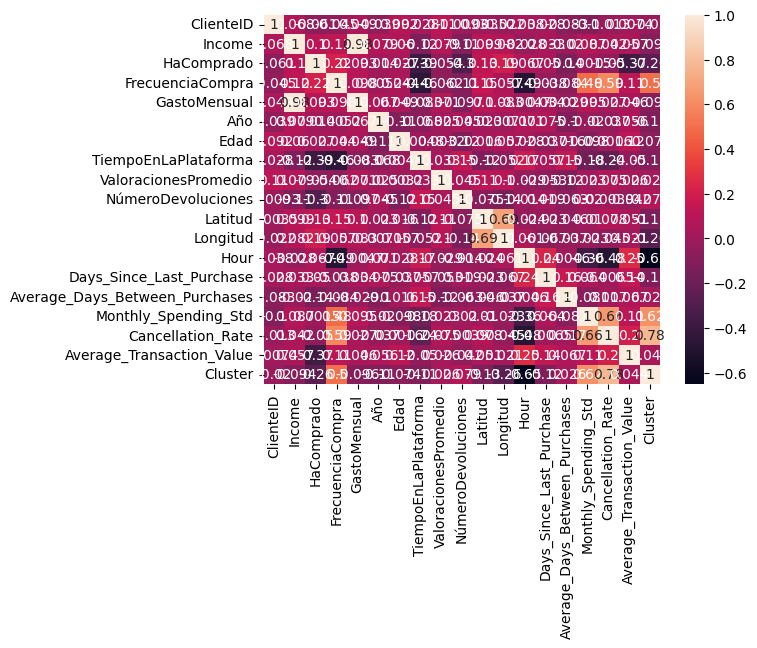

In [ ]:
sns.heatmap(clientes_clusters.corr(), annot=True);

In [ ]:
# En las columnas que haya valores negativos execepto en Latitud y Longitud, se cambian a 

In [448]:
df_sin_negativos.to_csv('datasets/Clientes_Dummy_Europe_Cities_Random_Final.csv', index=False)

In [ ]:
# 